# Customer Churn Analysis

# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
pd.set_option("display.max_columns",None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Here we have imported the dataset using pd.red_csv and set the option to display all the columns present in the dataset.

The dataset contains the details of customers in which both numerical and categorical data are present. Here "Churn" is the target variable which contains 2 categories so it will be termed as "Classification problem" where we need to predict the several customer churn using the classification models.

# Exploratory Data Analysis(EDA) & Feature Engineering:

In [3]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#lets convert TotalCharges to numeric data

df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [5]:
#Lets chcek the datatypes again
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
# checking the null values in the dataframe
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Lets replace null values from column TotalCharges with the mean value of that column
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [8]:
#Lets again chcek null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

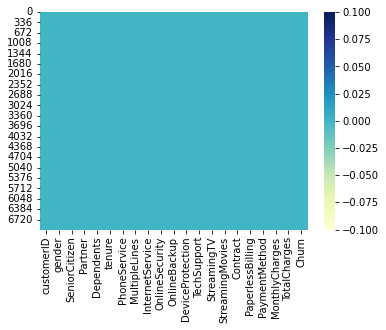

In [9]:
# Visul representation of no null
sns.heatmap(df.isnull(), cmap="YlGnBu")
plt.show()

In [10]:
# Checking duplicated values
df.duplicated().sum()

0

In [11]:
#Checking the number of unique values in each columns:
df.nunique().to_frame('Number of Unique Values')

,Number of Unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


From the above cell we can check the no. of unique values present in each columns.
As the column customerID is not required for model building we will drop this column.

In [12]:
df.drop(columns = 'customerID', inplace = True)

In [13]:
#Checking the value counts of each of the columns

for i in df.columns:
    print(f""" Column '{i}' :
{df[i].value_counts()}
---------------------------------
""")

 Column 'gender' :
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------------

 Column 'SeniorCitizen' :
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------------------

 Column 'Partner' :
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------------

 Column 'Dependents' :
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------------

 Column 'tenure' :
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---------------------------------

 Column 'PhoneService' :
Yes    6361
No      682
Name: PhoneService, dtype: int64
---------------------------------

 Column 'MultipleLines' :
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---------------------------------

 Column 'InternetService' :
Fiber optic    3096
DSL            2

In [14]:
# Replacing invalid values with valid 
df = df.replace('No internet service', 'No')

In [15]:
df['PhoneService'] = df['PhoneService'].replace('No phone service','No')
df['MultipleLines'] = df['PhoneService'].replace('No phone service','No')


In [16]:
# ReChecking the value counts of each of the columns

for i in df.columns:
    print(f""" Column '{i}' :
{df[i].value_counts()}
---------------------------------
""")

 Column 'gender' :
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------------

 Column 'SeniorCitizen' :
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------------------

 Column 'Partner' :
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------------

 Column 'Dependents' :
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------------

 Column 'tenure' :
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---------------------------------

 Column 'PhoneService' :
Yes    6361
No      682
Name: PhoneService, dtype: int64
---------------------------------

 Column 'MultipleLines' :
Yes    6361
No      682
Name: MultipleLines, dtype: int64
---------------------------------

 Column 'InternetService' :
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtyp

# Statistical Analysis of the DataSet:

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [18]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Data Visualization:

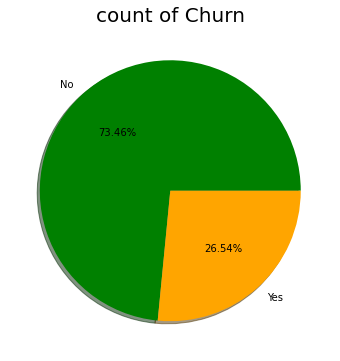

In [19]:
# Visualize the count of Churn of the customer
labels='No','Yes'
fig, ax = plt.subplots(figsize=(6,6))
colors = ["green","orange"]
ax.pie(df['Churn'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title('count of Churn',fontsize=20)
plt.show()

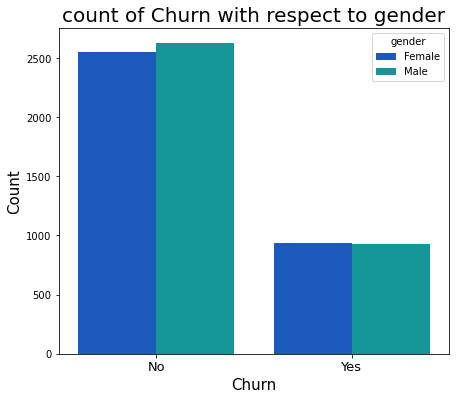

In [20]:
plt.figure(figsize=(7,6))
sns.countplot( x = 'Churn',hue = 'gender',data = df,palette = 'winter')

plt.title('count of Churn with respect to gender',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

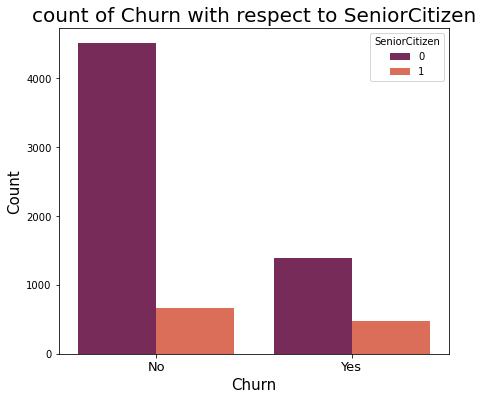

In [21]:
plt.figure(figsize=(7,6))
sns.countplot( x = 'Churn',hue = 'SeniorCitizen',data = df,palette = 'rocket')

plt.title('count of Churn with respect to SeniorCitizen',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

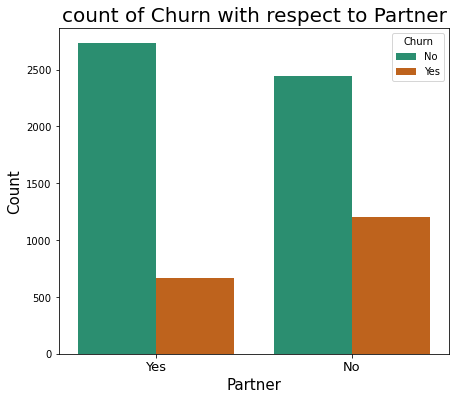

In [22]:
plt.figure(figsize=(7,6))
sns.countplot( x = 'Partner',hue = 'Churn',data = df,palette = 'Dark2')

plt.title('count of Churn with respect to Partner',fontsize=20)
plt.xlabel('Partner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

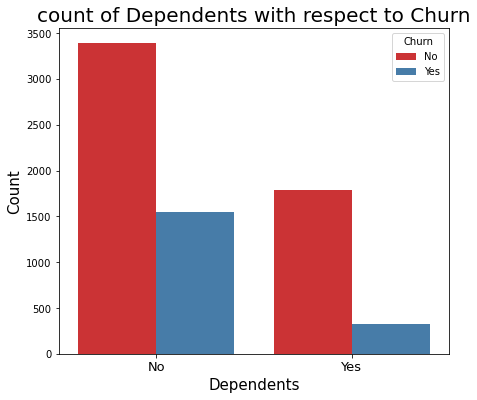

In [23]:
#check the relation between Partner and Churn

plt.figure(figsize=(7,6))
sns.countplot( x = 'Dependents',hue = 'Churn',data = df,palette = 'Set1')

plt.title('count of Dependents with respect to Churn',fontsize=20)
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

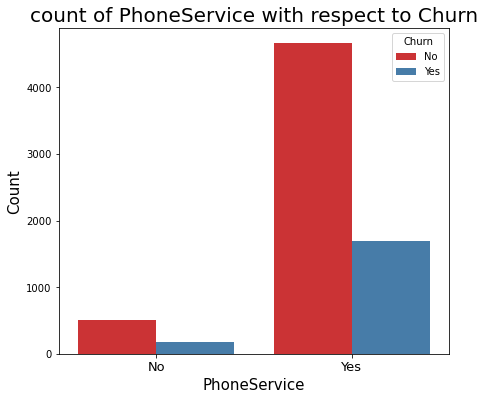

In [24]:
#check the relation between PhoneService and Churn
plt.figure(figsize=(7,6))
sns.countplot( x = 'PhoneService',hue = 'Churn',data = df,palette = 'Set1')

plt.title('count of PhoneService with respect to Churn',fontsize=20)
plt.xlabel('PhoneService',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

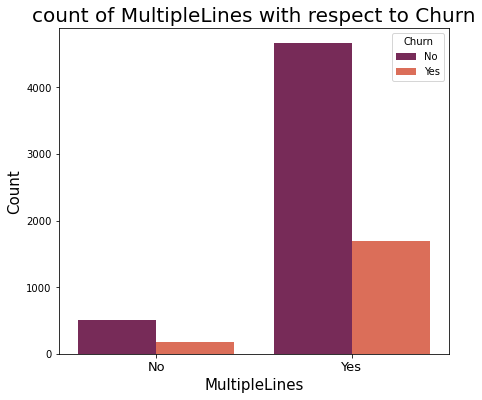

In [25]:
#check the relation between PhoneService and Churn
plt.figure(figsize=(7,6))
sns.countplot( x = 'MultipleLines',hue = 'Churn',data = df,palette = 'rocket')

plt.title('count of MultipleLines with respect to Churn',fontsize=20)
plt.xlabel('MultipleLines',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

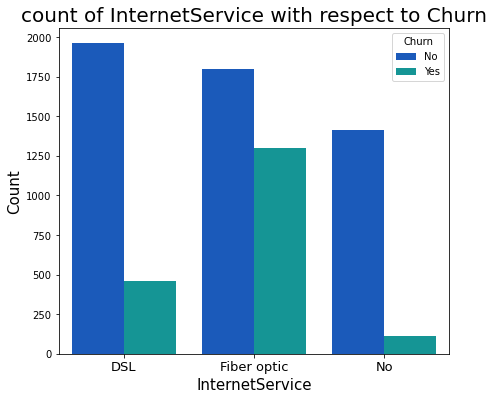

In [26]:
#check the relation between InternetService and Churn
plt.figure(figsize=(7,6))
sns.countplot( x = 'InternetService',hue = 'Churn',data = df,palette = 'winter')

plt.title('count of InternetService with respect to Churn',fontsize=20)
plt.xlabel('InternetService',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

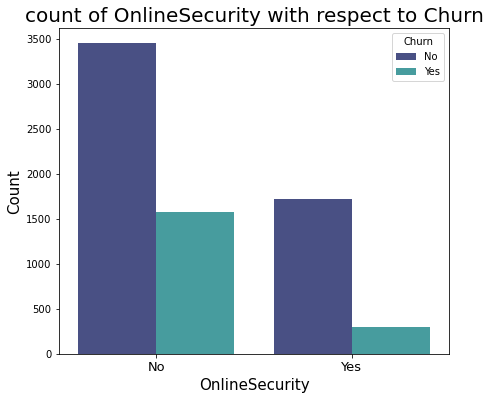

In [27]:
#check churn based on online security
plt.figure(figsize=(7,6))
sns.countplot( x = 'OnlineSecurity',hue = 'Churn',data = df,palette = 'mako')

plt.title('count of OnlineSecurity with respect to Churn',fontsize=20)
plt.xlabel('OnlineSecurity',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

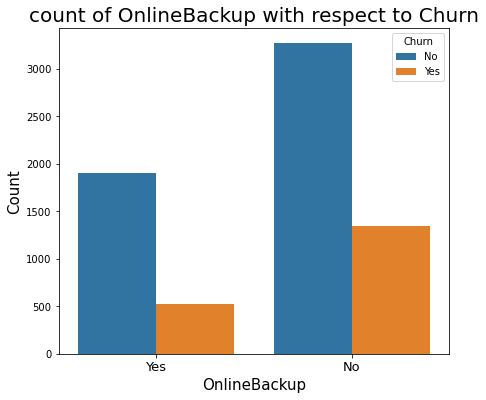

In [28]:
#check churn based on OnlineBackup
plt.figure(figsize=(7,6))
sns.countplot( x = 'OnlineBackup',hue = 'Churn',data = df)

plt.title('count of OnlineBackup with respect to Churn',fontsize=20)
plt.xlabel('OnlineBackup',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

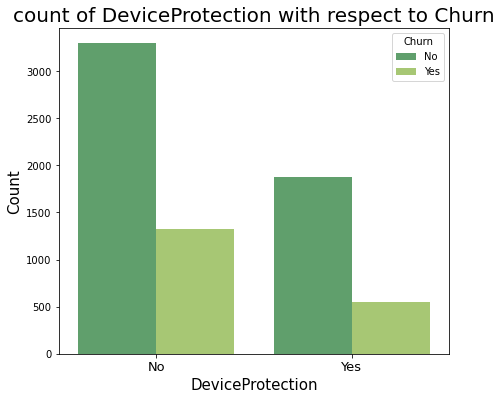

In [30]:
#check churn based on DeviceProtection
plt.figure(figsize=(7,6))
sns.countplot( x = 'DeviceProtection',hue = 'Churn',data = df,palette = 'summer')

plt.title('count of DeviceProtection with respect to Churn',fontsize=20)
plt.xlabel('DeviceProtection',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

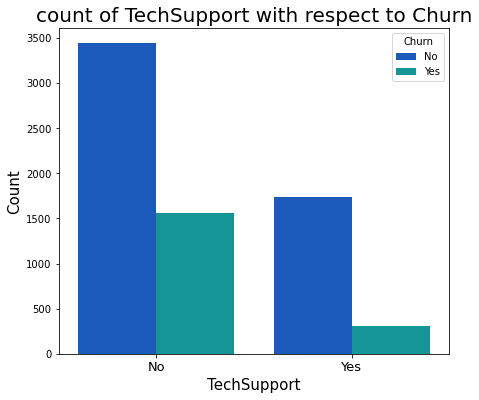

In [31]:
# check churn based on TechSupport
plt.figure(figsize=(7,6))
sns.countplot( x = 'TechSupport',hue = 'Churn',data = df,palette = 'winter')

plt.title('count of TechSupport with respect to Churn',fontsize=20)
plt.xlabel('TechSupport',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

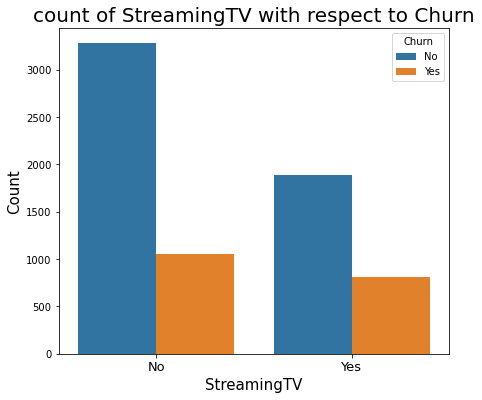

In [32]:
# check churn based on StreamingTV
plt.figure(figsize=(7,6))
sns.countplot( x = 'StreamingTV',hue = 'Churn',data = df)

plt.title('count of StreamingTV with respect to Churn',fontsize=20)
plt.xlabel('StreamingTV',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

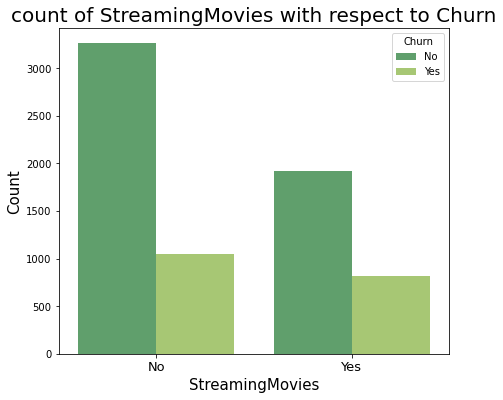

In [33]:
# check churn based on StreamingMovies
plt.figure(figsize=(7,6))
sns.countplot( x = 'StreamingMovies',hue = 'Churn',data = df,palette = 'summer')

plt.title('count of StreamingMovies with respect to Churn',fontsize=20)
plt.xlabel('StreamingMovies',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

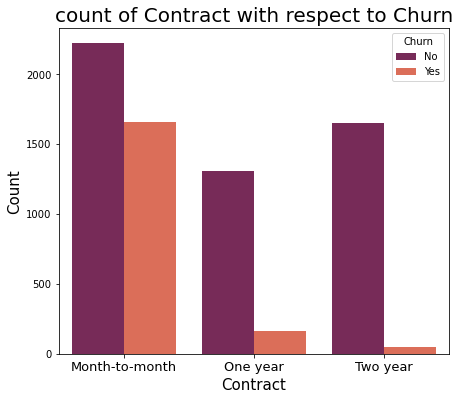

In [34]:
# check churn based on Contract
plt.figure(figsize=(7,6))
sns.countplot( x = 'Contract',hue = 'Churn',data = df,palette = 'rocket')

plt.title('count of Contract with respect to Churn',fontsize=20)
plt.xlabel('Contract',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

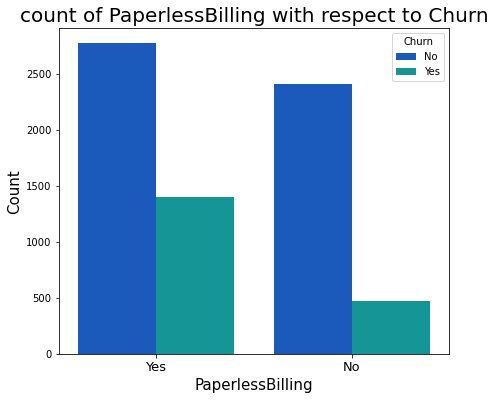

In [35]:
# check churn based on PaperlessBilling
plt.figure(figsize=(7,6))
sns.countplot( x = 'PaperlessBilling',hue = 'Churn',data = df,palette = 'winter')

plt.title('count of PaperlessBilling with respect to Churn',fontsize=20)
plt.xlabel('PaperlessBilling',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

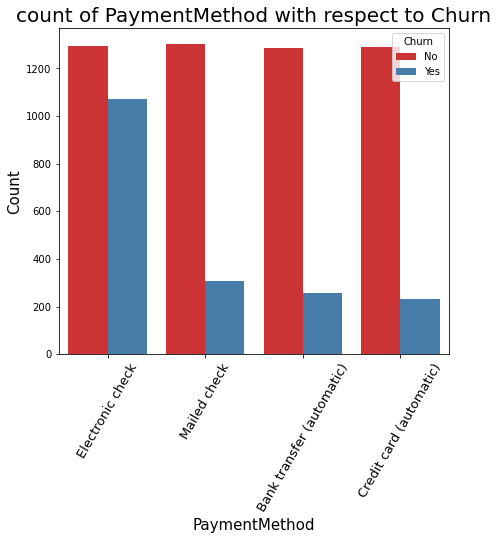

In [36]:
# check churn based on PaymentMethod
plt.figure(figsize=(7,6))
sns.countplot( x = 'PaymentMethod',hue = 'Churn',data = df,palette = 'Set1')

plt.title('count of PaymentMethod with respect to Churn',fontsize=20)
plt.xlabel('PaymentMethod',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13 ,rotation=60)

plt.show()

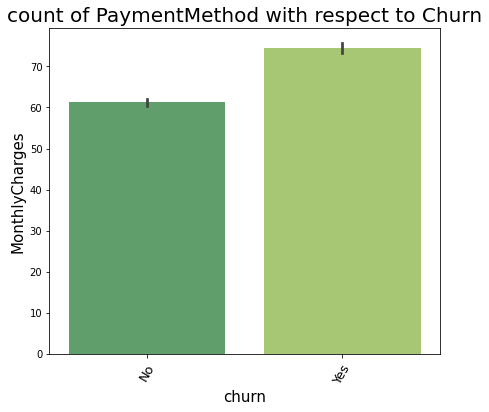

In [37]:
# barplot for MonthlyCharges vs churn
plt.figure(figsize=(7,6))
sns.barplot(x = 'Churn', y = 'MonthlyCharges', data = df, palette='summer')

plt.title('count of PaymentMethod with respect to Churn',fontsize=20)
plt.xlabel('churn',fontsize=15)
plt.ylabel('MonthlyCharges',fontsize=15)
plt.xticks(fontsize=13 ,rotation=60)

plt.show()

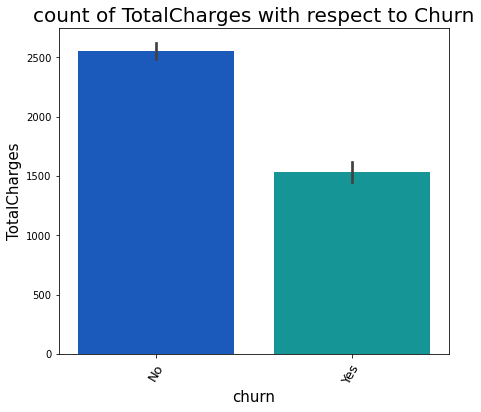

In [38]:
# barplot for TotalCharges vs churn
plt.figure(figsize=(7,6))
sns.barplot(x = 'Churn', y = 'TotalCharges', data = df, palette = 'winter')

plt.title('count of TotalCharges with respect to Churn',fontsize=20)
plt.xlabel('churn',fontsize=15)
plt.ylabel('TotalCharges',fontsize=15)
plt.xticks(fontsize=13 ,rotation=60)

plt.show()

<Figure size 504x432 with 0 Axes>

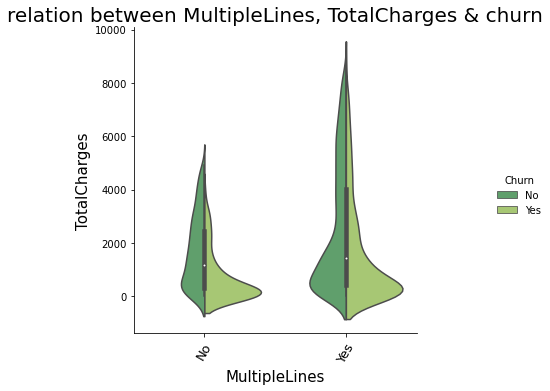

In [39]:
# lets check the relation between MultipleLines, TotalCharges, churn.

plt.figure(figsize=(7,6))
sns.catplot( x = 'MultipleLines', y="TotalCharges", hue = 'Churn', data = df, kind="violin", split=True, palette = 'summer')

plt.title('relation between MultipleLines, TotalCharges & churn',fontsize=20)
plt.xlabel('MultipleLines',fontsize=15)
plt.ylabel('TotalCharges',fontsize=15)
plt.xticks(fontsize=13 ,rotation=60)

plt.show()

<Figure size 504x432 with 0 Axes>

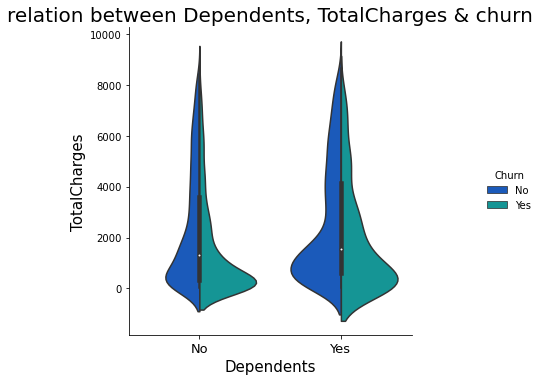

In [40]:
# lets check the relation between Dependents, TotalCharges, churn using Violin plot
plt.figure(figsize=(7,6))
sns.catplot( x = 'Dependents', y="TotalCharges", hue = 'Churn', data = df, kind="violin", split=True, palette = 'winter')

plt.title('relation between Dependents, TotalCharges & churn',fontsize=20)
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('TotalCharges',fontsize=15)
plt.xticks(fontsize=13)

plt.show()

<Figure size 504x432 with 0 Axes>

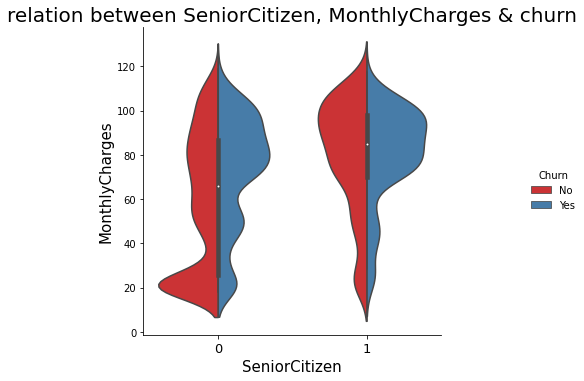

In [41]:
# lets check the relation between SeniorCitizen, MonthlyCharges, churn using Violin plot
plt.figure(figsize=(7,6))
sns.catplot( x = 'SeniorCitizen', y="MonthlyCharges", hue = 'Churn', data = df, kind="violin", split=True, palette = 'Set1')

plt.title('relation between SeniorCitizen, MonthlyCharges & churn',fontsize=20)
plt.xlabel('SeniorCitizen',fontsize=15)
plt.ylabel('MonthlyCharges',fontsize=15)
plt.xticks(fontsize=13)

plt.show()

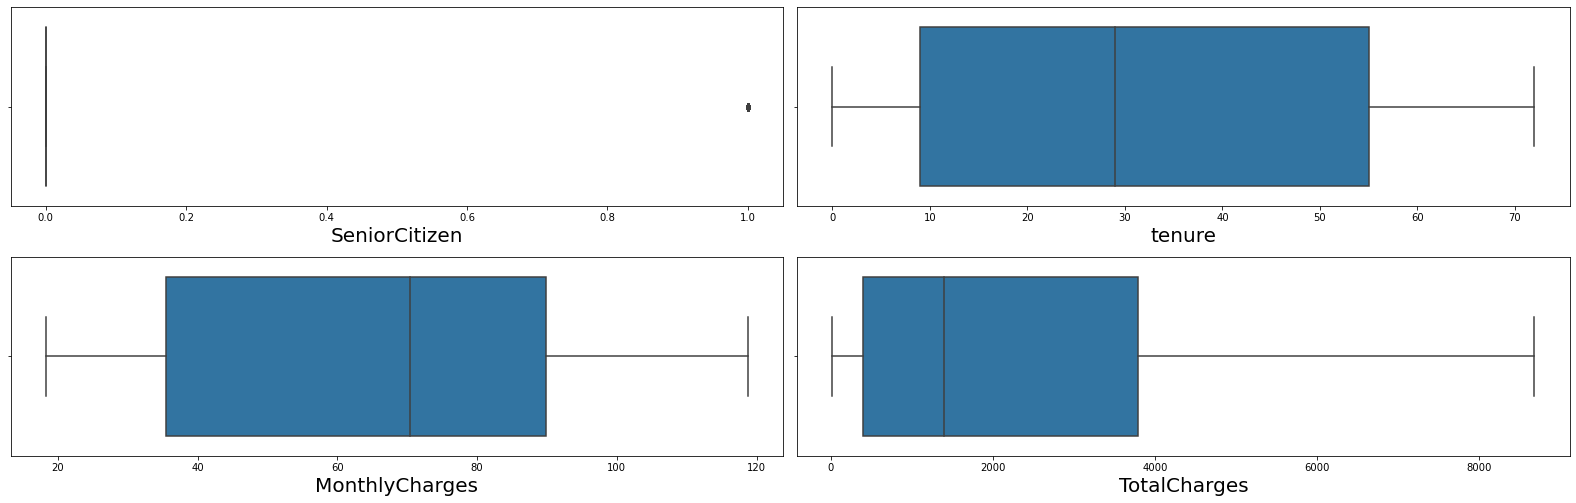

In [42]:
#lets check outliers from continuous columns

num_data = df._get_numeric_data()
plt.figure(figsize = (22,10),facecolor='white')

plotnumber = 1

for column in num_data:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
    
plt.tight_layout()

In [43]:
#Encoding the categorical columns using Label Encoding:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
# Encoding cateforical columns into binary columns
df.replace({'Yes':1, 'No':0}, inplace = True)
df['gender'].replace({'Male':1, 'Female':0}, inplace = True)

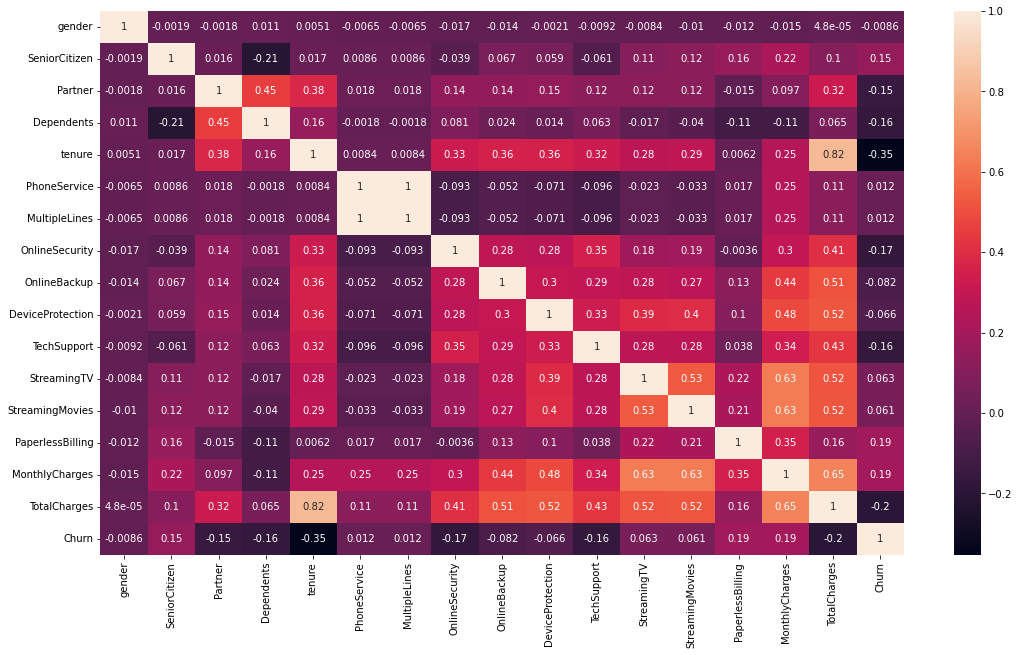

In [45]:
# Plotting Heatmap for correlation
plt.figure(figsize =(18,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Heatmap Analysiis -

Our target Variable is negatively related to Online security , online backup, Tech support, device protection, tenure, gender, partner, dependents
Mutiple lines and Phones services are 100 % correlated we can drop one of them

In [46]:
# Dropping highcorrelated column
df.drop('MultipleLines', axis ='columns', inplace = True)

In [47]:
df.shape

(7043, 19)

In [48]:
# encoding categorical columns with one hot encoder

def onehot_encoder(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis = 1)
        df.drop(column, axis = 1 , inplace = True)
        
    return df

In [49]:
# Encoding Catregrical columsn(Wind-direction)
cat_feat = ['InternetService','Contract','PaymentMethod',]

df = onehot_encoder(df,cat_feat )

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

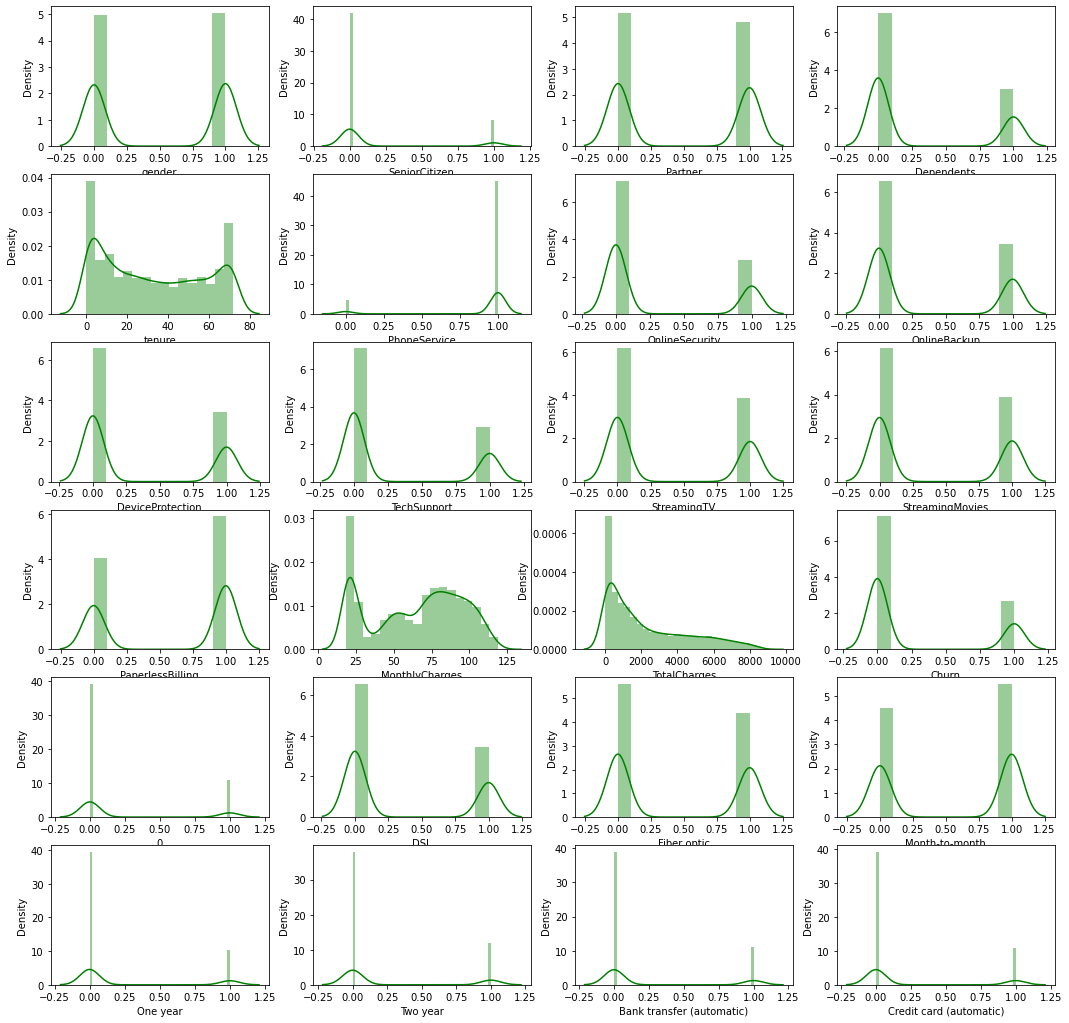

In [50]:
# Checking data distrubution
plt.figure(figsize = (18,18))

plotno = 1

for column in df:
    if plotno<=24:
        ax= plt.subplot(6,4, plotno)
        sns.distplot(df[column],color = "g")
        plt.xlabel(column)
        
    plotno +=1
    
plt.tight_layout

In [51]:
# splitting data into label and features
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [52]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,0,DSL,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,0,0,0,0,0,1,29.60,346.45,0,1,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,0,0,0,0,0,0,1,74.40,306.60,0,0,1,1,0,0,0,0,0,1


# Separating the feature and label into x and y

In [53]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [54]:
# Dimension of x
x.shape

(7043, 25)

In [55]:
# Dimension of y
y.shape

(7043,)

In [56]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,0,DSL,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.160323,-0.994971,-0.525927,1.381712,-0.885660,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,-1.205113,-0.259629,-0.173876,-0.525927,1.381712,-0.885660,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.362660,-0.960399,-0.525927,1.381712,-0.885660,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,-1.205113,-0.746535,-0.195400,-0.525927,1.381712,-0.885660,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.197365,-0.941193,-0.525927,-0.723740,1.129102,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.829798,0.665992,-0.129281,-0.525927,1.381712,-0.885660,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.829798,1.277533,2.242808,-0.525927,-0.723740,1.129102,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-1.168632,-0.855182,-0.525927,1.381712,-0.885660,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,0.320338,-0.872777,-0.525927,-0.723740,1.129102,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513


# Checking Variance Inflation Factor(VIF)

In [57]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001991,gender
1,1.153027,SeniorCitizen
2,1.461903,Partner
3,1.383983,Dependents
4,7.290827,tenure
5,9.235968,PhoneService
6,2.358155,OnlineSecurity
7,2.486019,OnlineBackup
8,2.568958,DeviceProtection
9,2.415828,TechSupport


In [58]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [59]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001758,gender
1,1.153020,SeniorCitizen
2,1.461570,Partner
3,1.383542,Dependents
4,2.758582,tenure
5,9.211055,PhoneService
6,2.349187,OnlineSecurity
7,2.465801,OnlineBackup
8,2.560847,DeviceProtection
9,2.409142,TechSupport


In [60]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# modeling

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8050165641268339  on Random_state  98


In [62]:
#Creating train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [63]:
#Classification Algorithms
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [64]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

rfc=accuracy_score(y_test, predRFC)
print(rfc)
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8002839564600095
[[1437  158]
 [ 264  254]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1595
           1       0.62      0.49      0.55       518

    accuracy                           0.80      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



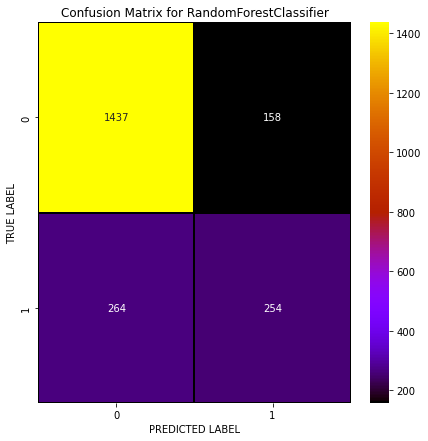

In [65]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [66]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

lr=accuracy_score(y_test, predLR)
print(lr)
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8106956933270232
[[1430  165]
 [ 235  283]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1595
           1       0.63      0.55      0.59       518

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.81      2113



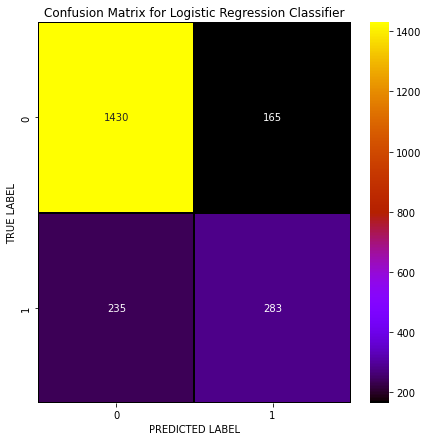

In [67]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [68]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

sv=accuracy_score(y_test, predsvc)
print(sv)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7998106956933271
[[1432  163]
 [ 260  258]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1595
           1       0.61      0.50      0.55       518

    accuracy                           0.80      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



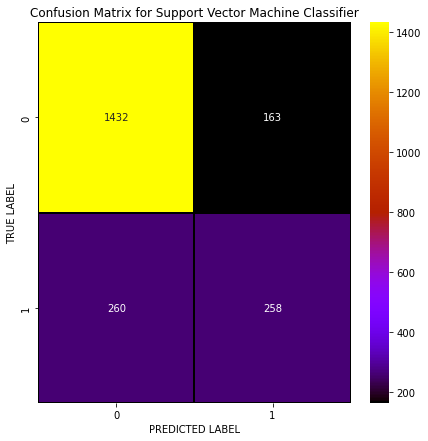

In [69]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()


In [70]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

gbc=accuracy_score(y_test, predGB)
print(gbc)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8121154756270705
[[1446  149]
 [ 248  270]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1595
           1       0.64      0.52      0.58       518

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.80      0.81      0.81      2113



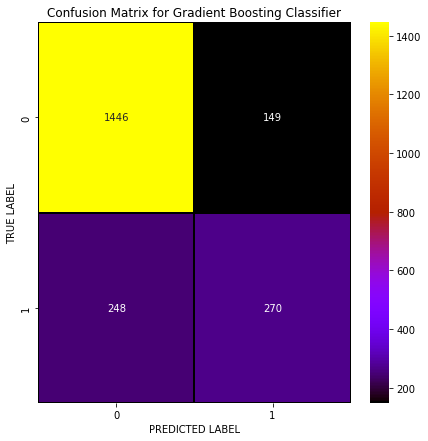

In [71]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


In [72]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

abc=accuracy_score(y_test, predABC)
print(abc)
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8111689540937056
[[1433  162]
 [ 237  281]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1595
           1       0.63      0.54      0.58       518

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.81      2113



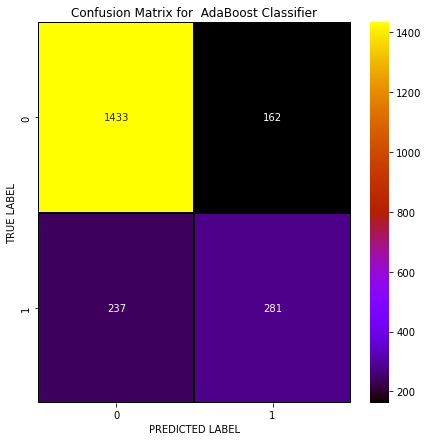

In [73]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

In [74]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)

# Prediction
predBC = BC.predict(x_test)

bc=accuracy_score(y_test, predBC)
print(bc)
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test,predBC))

0.7884524372929484
[[1424  171]
 [ 276  242]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1595
           1       0.59      0.47      0.52       518

    accuracy                           0.79      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.78      0.79      0.78      2113



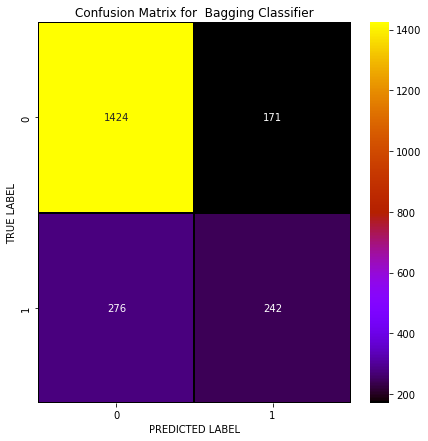

In [75]:
# Lets plot confusion matrix for  Bagging Classifier
cm = confusion_matrix(y_test,predBC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Bagging Classifier')
plt.show()

In [76]:
# Checking accuracy for ExtraTreesClassifier
XT = ExtraTreesClassifier()
XT.fit(x_train,y_train)

# Prediction
predXT = XT.predict(x_test)

xt=accuracy_score(y_test, predXT)
print(xt)
print(confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))

0.7851396119261713
[[1404  191]
 [ 263  255]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1595
           1       0.57      0.49      0.53       518

    accuracy                           0.79      2113
   macro avg       0.71      0.69      0.69      2113
weighted avg       0.78      0.79      0.78      2113



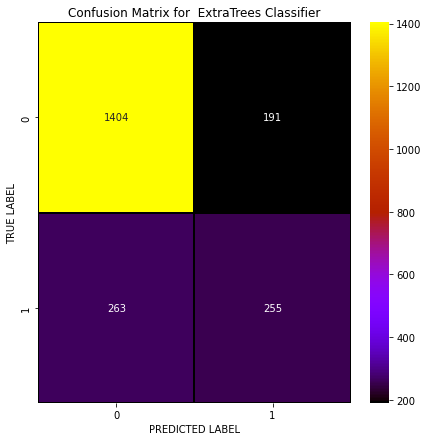

In [77]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(y_test,predXT)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

In [78]:
# Checking accuracy for XGBClassifier
XGB = xgb(verbosity=0)
XGB.fit(x_train,y_train)

# Prediction
predXGB = XGB.predict(x_test)
xg=accuracy_score(y_test, predXGB)
print(accuracy_score(y_test, predXGB))
print(confusion_matrix(y_test, predXGB))
print(classification_report(y_test,predXGB))

0.8002839564600095
[[1417  178]
 [ 244  274]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1595
           1       0.61      0.53      0.56       518

    accuracy                           0.80      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.80      0.80      2113



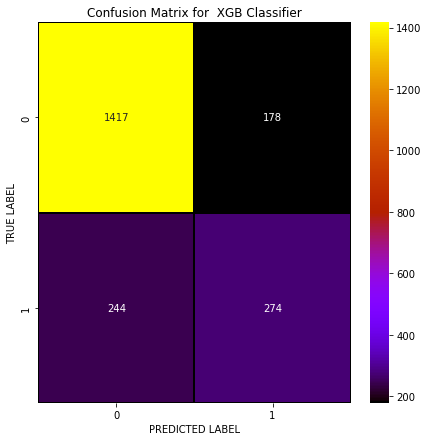

In [79]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predXGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

# checking cross validation score

In [80]:
# cv score for Random Forest Classifier
rf_cv=cross_val_score(RFC,x,y,cv=5).mean()
print(rf_cv)

0.7827638073424091


In [81]:
# cv score for Logistic Regression
lr_cv=cross_val_score(LR,x,y,cv=5).mean()
print(lr_cv)

0.8016472836957224


In [82]:
# cv score for Support Vector Machine Classifier
sv_cv=cross_val_score(svc,x,y,cv=5).mean()
print(sv_cv)

0.7955413454093812


In [83]:
# cv score for Gradient Boosting Classifier
gb_cv=cross_val_score(GB,x,y,cv=5).mean()
gb_cv

0.8036339038002451

In [84]:
# cv score for AdaBoosting Classifier
ada_cv=cross_val_score(ABC,x,y,cv=5).mean()
print(ada_cv)

0.801788321020711


In [85]:
# cv score for Bagging Classifier
bc_cv=cross_val_score(BC,x,y,cv=5).mean()
print(bc_cv)

0.7736773340215498


In [86]:
# cv score for Extra Trees Classifier
ex_cv=cross_val_score(XT,x,y,cv=5).mean()
print(ex_cv)

0.7695587215304214


In [87]:
# cv score for XGB Classifier
xbg_cv=cross_val_score(XGB,x,y,cv=5).mean()
print(xbg_cv)

0.7792148888637976


In [88]:
model_list=['Random Forest Classifier',' Logistic Regression','Support Vector Machine Classifier','Gradient Boosting Classifier','AdaBoosting Classifier','Bagging Classifier','Extra Trees Classifier','XGB Classifier']


In [89]:
accuracyscore=[rfc,lr,sv,gbc,abc,bc,xt,xg]

In [90]:
accuracyscore

[0.8002839564600095,
 0.8106956933270232,
 0.7998106956933271,
 0.8121154756270705,
 0.8111689540937056,
 0.7884524372929484,
 0.7851396119261713,
 0.8002839564600095]

In [91]:
crossval=[rf_cv,lr_cv,sv_cv,gb_cv,ada_cv,bc_cv,ex_cv,xbg_cv]

In [92]:
models=pd.DataFrame({})
models["Classifier"]=model_list
models["Accuracy_score"]=accuracyscore
models["Cross Validation_Score"]=crossval

In [93]:
models

,Classifier,Accuracy_score,Cross Validation_Score
0,Random Forest Classifier,0.800284,0.782764
1,Logistic Regression,0.810696,0.801647
2,Support Vector Machine Classifier,0.799811,0.795541
3,Gradient Boosting Classifier,0.812115,0.803634
4,AdaBoosting Classifier,0.811169,0.801788
5,Bagging Classifier,0.788452,0.773677
6,Extra Trees Classifier,0.785140,0.769559
7,XGB Classifier,0.800284,0.779215


# Hyper Parameter Tuning

In [94]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}


In [95]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [96]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [97]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [98]:
FinalModel = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=300, n_jobs=-2, random_state=10)
FinalModel.fit(x_train, y_train)
pred = FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.99337434926645


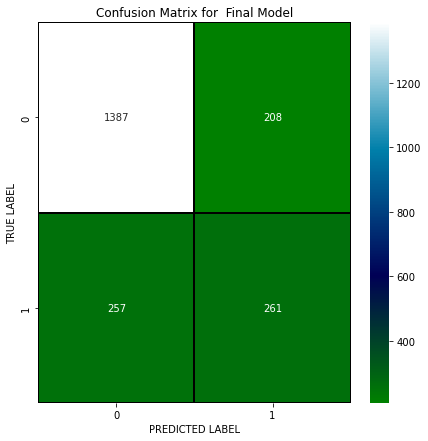

In [99]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

# Plotting AUC ROC curve for all models

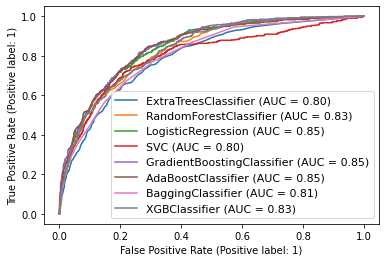

In [100]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(XT,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

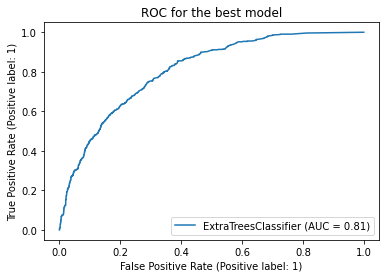

In [101]:
#Plotting ROC and Compare AUC for the best model
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(FinalModel, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [102]:
# Saving the model using .pkl
import joblib
joblib.dump(FinalModel,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']

In [103]:
#Conclusion
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Customer_Churn_Analysis.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
2108,1,1
2109,0,0
2110,0,0
2111,0,0
